In [732]:
#Cargar la biblioteca pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [733]:
#Creamos un data frame a partir del archivo que leemos
df0=pd.read_csv('hermosillo.dat')

In [734]:
#Creamo una columa de tipo tiempo y borramos la anterior
df0['FECHA'] = pd.to_datetime(df0.apply(lambda x: x['TIMESTAMP'], 1), dayfirst=True)
df0 = df0.drop(['TIMESTAMP'], 1)

In [735]:
#Crea una columna de los meses
df0['month'] = pd.DatetimeIndex(df0["FECHA"]).month

#Crea una columna de años
df0["year"] = pd.DatetimeIndex(df0["FECHA"]).year

#Crea una columna de los dias
df0["day"] = pd.DatetimeIndex(df0["FECHA"]).day

#Crea una columna de las horas
df0["HOR"] = pd.DatetimeIndex(df0["FECHA"]).hour

In [736]:
#Creamos otro dataframe con las columas que ocuparemos
df=df0[["FECHA","AirTC_Avg","HOR","day","month","year"]]

In [737]:
#Dividimos el dataframe a partir del tiempo donde comenzaremos el analsisis (Primero de noviembre)
df=df.loc[(df['FECHA']>='2018-11-01 00:00:00')]


In [739]:
#Sacamos un promedio de las temperaturas, por hora
#df['TPROM']=df.groupby(['AÑO','MES','DIA','HOR'])['AirTC_Avg'].transform('mean')
df['TMIN']=df.groupby(['year','month','day'])['AirTC_Avg'].transform('min')
df.head()

,FECHA,AirTC_Avg,HOR,day,month,year,TMIN
24935,2018-11-01 00:00:00,9.13,0,1,11,2018,6.096
24936,2018-11-01 00:10:00,8.89,0,1,11,2018,6.096
24937,2018-11-01 00:20:00,8.66,0,1,11,2018,6.096
24938,2018-11-01 00:30:00,8.52,0,1,11,2018,6.096
24939,2018-11-01 00:40:00,8.47,0,1,11,2018,6.096


In [740]:
#Determinamos el valor de HFE por hora, a partir de restricciones
df['TPROM']=df.groupby(['year','month','day','HOR'])['AirTC_Avg'].transform('mean')
condicion=[(df["TPROM"]>=0) & (df["TPROM"]<=10),
          (df["TPROM"]>=25)]
resultados=[1,-1]
df["HFE"]= np.select(condicion,resultados,default=0)
#df= df.resample('d', on='FECHA').sum().dropna(how='all')

In [722]:
df.drop(["FECHA","AirTC_Avg","TPROM"], axis = 1, inplace = True, errors = 'ignore')
df=df.drop_duplicates()

In [723]:
df['HFESUM']=df.groupby(['year','month','day'])['HFE'].transform("sum")

In [724]:
df.drop(["HOR"], axis = 1, inplace = True, errors = 'ignore')

In [725]:
df["FECHA"]=pd.to_datetime(df[['year', 'month', 'day']])

In [726]:
df.drop(["day","month","year","HFE"], axis = 1, inplace = True, errors = 'ignore')

In [727]:
df = df[~df.index.duplicated(keep='FECHA')]

In [728]:
df=df.drop_duplicates()

In [729]:
df["sumHFE"]=df["HFESUM"].cumsum()

In [730]:
df.drop(["HFESUM"], axis = 1, inplace = True, errors = 'ignore')

In [731]:
df.head()

,TMIN,FECHA,sumHFE
24935,6.096,2018-11-01,2
25079,10.020,2018-11-02,-6
25223,10.160,2018-11-03,-14
25367,11.160,2018-11-04,-22
25511,11.130,2018-11-05,-30


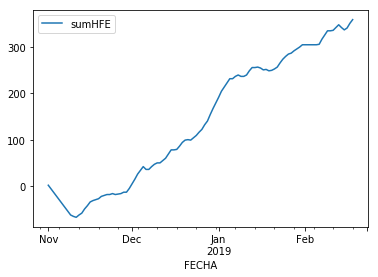

In [713]:
df.reset_index().plot(x="FECHA",y=["sumHFE"])